## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

Bir onceki ders Decision Tree modeli icin penguins data setini kullanmistik ve model oncesi dataya get_dummies islemi uygulamistik.

Bu calismada ayni data setine Decision Tree ve Random Forest modellerinin ikisini de uygulayacagiz. Fakat bu sefer modelleri kurmadan once get_dummies yerine "Encoder" islemini uygulayacagiz.

get_dummies ile kurulmus Decision Tree ile Encoder uygulanmis Decision Tree skorlarini kendi aralarinda kiyaslayip sonra bu iki model skorlarini Random Forest modeli ile kiyaslayacagiz.

**Random forest prevents overfitting. It uses a random subset of features rather than using all features.**

**Not good on smaller data sets.**

In [5]:
df = pd.read_csv("penguins_size.csv")

In [6]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis and Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [9]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [11]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [13]:
df.loc[336, "sex"] = "MALE"

In [14]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

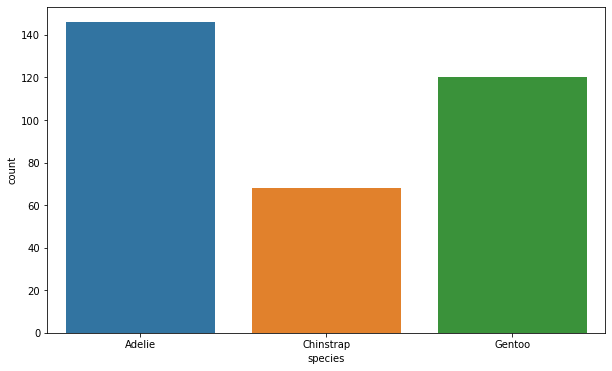

In [15]:
sns.countplot(x="species", data = df);

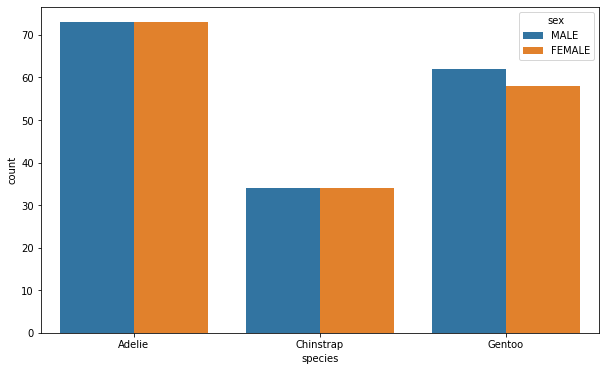

In [16]:
sns.countplot(x="species", data = df, hue = "sex");

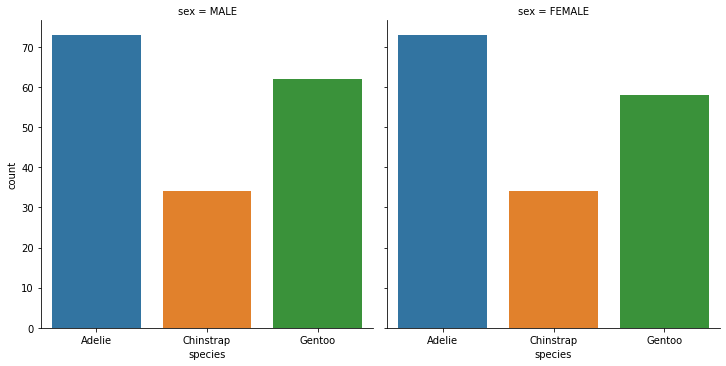

In [17]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

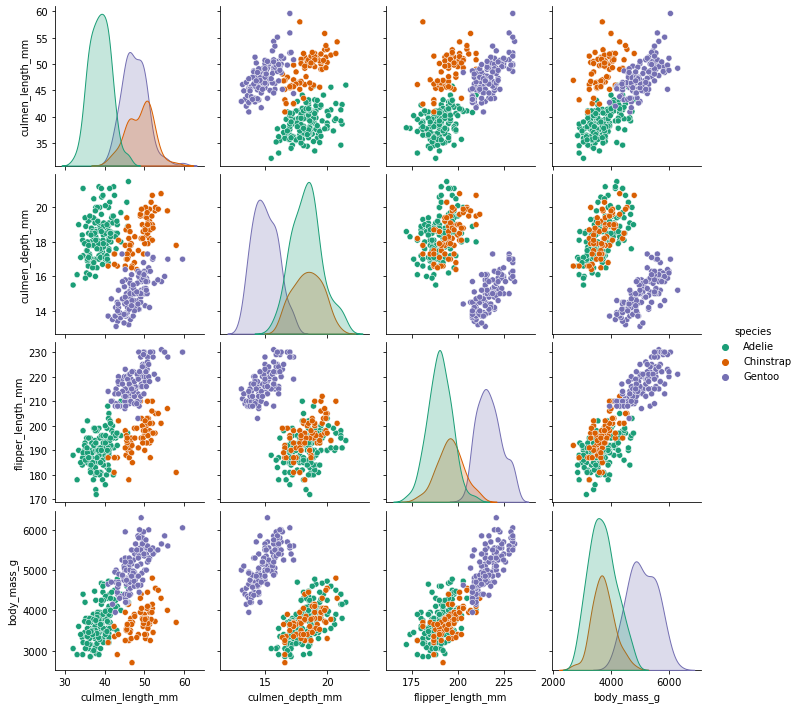

In [21]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

# Feature' lar birbirinden iyi ayrismis.

In [19]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Asagida numeric feature' lar  arasinda multicollinearity sorunu var ama Tree based modeller nonparametric modeller oldugu icin bu onemli degil.

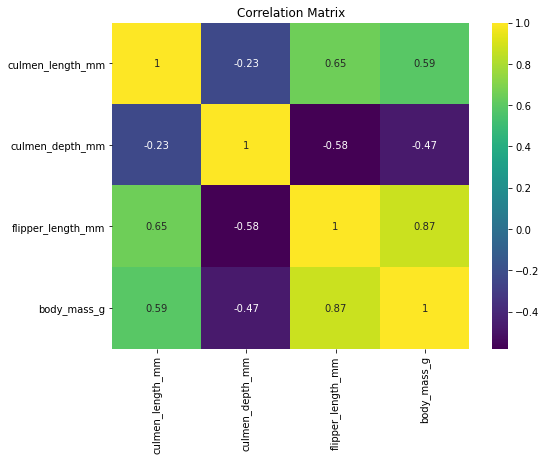

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## OrdinalEncoder (SADECE TREE BASED MODELLER ICIN, GET_DUMMIES YERINE)

https://bookdown.org/max/FES/categorical-trees.html

https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

ENCODER; skorlari iyilestirir; hizi artitir; feature importance' i dogru yapmayi saglar.

Simdiye kadar feature' lar arasinda hiyearsik bir duzen yoksa onlari dummies feature' lara donusturuyorduk; varsa da 0 - 1 gibi kodluyorduk (male-female gibi). 

LinearRegression gibi modellerde, 1-2-3 seklinde hiyerarsik bir duzenle kodlanan featur' larda 3'e 1' den daha cok agirlik verebilirdi. Bu yuzden get_dummies yapmak cok onemliydi. O tarz modellerde get_dummies yapmayip "Label Encoder" yapilirsa model yanlis sonuclar verirdi.

Tree based modeller arkada hicbir hesaplama yapmadan if else mantigi ile calistigi icin, sadece sorulan sorulara evet-hayir cevabini verip ilerlemesi nedeniyle bu modellerde "Label Encoder" yapmakta hicbir sakinca yoktur; hatta yapmak sonuclari iyilestirir. Cunku arka planda yaptigi istatistiksel bir islem yoktur. Eger bu modellerde get_dummies yapilirsa sonuclar hatalar cikar. Ayni zamanda islem maliyeti artar, calismayi tamamlama suresi cok uzar.

Onceki tree model calismalarimizda get_dummies kullanmistik. Simdi "Label Encoding" kullanarak sonuclarin ne kadar iyilestigini gorecegiz. Cunku onemli olan bir feature' a get_dummies uygulandiginda yeni feature' lar oluasacagi icin onem de bolunmus olur. Bu da sonuclarimizi yaniltir.

!!! Tree based modellerde get_dummies yapilmaz. Onun yerine "Label Encoder" kullanilir. !!!

LABEL ENCODER -----> Hiyerarsik duzeni olan feature' lara numara vererek islem yapar. Mesela island feature' inda kac tane ada varsa hepsine bir numara verir.

!!! "Label Encoder" butun feature' lara teker teker islemle sayisal verilere donusturur; "Ordinal Encoder" tum data setindeki kategorik verilerin hepsini tek bir islemle sayisal verilere donusturur.  !!!

In [22]:
from sklearn.preprocessing import OrdinalEncoder

Ordinal Encoder' in nasil calistigina asagida bir DataFrame ornegi olusturarak bakalim :

- OrdinalEncoder is for 2D data with the shape (n_samples, n_features)
- LabelEncoder is for 1D data with the shape (n_samples,)
- OrdinalEncoder is for converting features, while LabelEncoder is for converting target variable.
- Aslında ayni işlemler, çok ufak farklar var.

In [23]:
data = {"animal": ["cat", "dog", "horse", "lion", "tiger"]}     # Egitilen data
predict = {"animal": ["lion", "horse"]}      # Tahminlerin alinacagi data

In [24]:
data = pd.DataFrame(data)
data

,animal
0,cat
1,dog
2,horse
3,lion
4,tiger


In [100]:
predict = pd.DataFrame(predict)
predict

,animal
0,lion
1,horse


Asagida Encoder islemini uyguladigimizda butun hayvan isimlerini sayilara cevirdi. Herkesin index no' su ne ise o sayiyi atadi. Predict islemini yaparken de test datasini da ayni no' lara donusturup tahminlerini ona gore alacak.

In [25]:
encoder = OrdinalEncoder()
encoder.fit_transform(data)    # Butun dataya uygulandi.

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [102]:
encoder.transform(predict)   # Train' de lion degeri 3 idi; predict datasinda da 3' e cevirdi.

array([[3.],
       [2.]])

!!! Yukarida da goruldugu gibi, encoder ile egitim datasina fit_transform uygulandi; predict datasina sadece transfot uygulandi. !!!

## Train | Test Split

In [28]:
X = df.drop('species',axis=1)
y = df['species']

Yukarida X ve y' yi elde ettikten sonra asagida "Ordinal Encoder" islemini uygulayabilmek icin X icindeki kategorik verileri elde etmemiz gerekiyor. (y' ye dokunmuyoruz.) Asagidaki kod bize X' in icindeki kategorik feauture' lari verir :

In [31]:
cat = X.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [32]:
X[cat]

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
4,Torgersen,FEMALE
5,Torgersen,MALE
...,...,...
338,Biscoe,FEMALE
340,Biscoe,FEMALE
341,Biscoe,MALE
342,Biscoe,FEMALE


OrdinalEncoder' i bir degiskene atayalim ve X[cat]' e fit_transform islemini uygulayalim. Island isimlerini ve sex'i numeric verilere donusturdugunu goruyoruz:

In [33]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,39.1,18.7,181.0,3750.0,1.0
1,2.0,39.5,17.4,186.0,3800.0,0.0
2,2.0,40.3,18.0,195.0,3250.0,0.0
4,2.0,36.7,19.3,193.0,3450.0,0.0
5,2.0,39.3,20.6,190.0,3650.0,1.0


Datamiz artik isleme hazir; test ve train olarak ayirabiliriz :

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Modelling and Model Performance

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Decision Tree

Daha onceki calismada Decision Tree model icin get_dummies yaptigimiz feature' lari kullanmistik. Ayni calismayi bir de Encoder ile yapalim ve farki gozlemleyelim :

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

Default degerler ile Encoder' a donusturdugumuz degerlere bakalim :

In [47]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



Bir onceki calismada get_dummies ile egitilen datada 3 hata vardi, Encoding ile yapilan bu islemde hata 1' e dustu; tahminlerimiz iyilesti. 

__Cross Validate__

In [48]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [49]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.974457
test_precision_micro    0.974457
test_recall_micro       0.974457
test_f1_micro           0.974457
dtype: float64

Cross Validate isleminden sonra, biraz dusuk olsa da yukaridakine yakin sonuclar aldik.

### DT Model Feature Importance

In [50]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.336093
island,0.084673
body_mass_g,0.028136
sex,0.010853
culmen_depth_mm,0.009044


Asagidaki kod daha onceki Decision Tree' den aldigimiz sonuclar. Orda get_dummies kullanmistik ve bazi feature' lari direk sifirlamisti; onlardan hic bilgi inside etmemisti (get_dummies yapilan feature' lar). Ama yukaridaki skorlara bakarsak Encoder isleminden sonra diger feature' lara da onem vermis. 

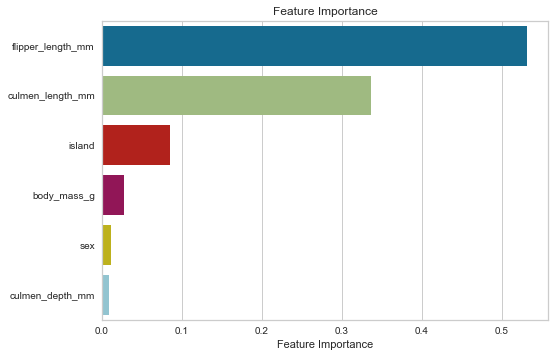

In [115]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Random Forest

Decision Tree Modelde bir tane agac varken Random Forest' ta birden fazla agac vardir. (default=100)

Bu modelde overfitting' i onleyen iki onemli husus :

1 - Boostrap (Agaclar icin datanin 2/3' unu kullanmasi)

2- n_estimater parametresinde feature' larin hepsini almayip feature sayisinin karekoku kadar feature secmesi.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

__PARAMETERS__

1- N_ESTIMATORS -----> "Modelimde kac tane agac modeli olsun?"  Random Forest icin en onemli parametredir. (Default=100)

!! Yapilan arastirmalarda n_estimators icin 64 ve 128 sayilarinin mutlaka denenmesi gerektigi soylenmis, bu degerler ile iyi sonuclar alindigi gozlenmistir.

2- CRITERION -----> GINI : Bulundugu bolgedeki yanlis hesaplamanin degerini minimize etmeye calisir. Bu yuzden gini kucukse, hata da kucuk demektir. Basari arttikca gini 0' a yaklasir. Tum class' lari mukemmel ayirdigi noktada gini=0 olur. Gini, her dalda ayirt edici soruyu sordugunda en dusuk degeri veren (yani en kucuk hatayi veren) class' i secer. ENTROPY : Kaos demektir. Kaosun en az olmasini isteriz. 


    - Gini ve entropy kısaca error gibi düşünelim.

!!! Basari orani arttikca gini ve entropy 0' a yaklasir. !!!

3- MAX_DEPTH------> Agac ne kadar derinlige insin? (Oklarin adim sayisi) (Bias ekleme islemi)

4- MIN_SAMPLES_SPLIT ----> Bir yapragin bolunebilmesi icin o yaprakta bulunmasi gereken sample sayisi. Default degeri=2. Yani, "sample sayisi en az 2 ise bolunmeye devam et". Hata kaldiysa bolmeye devam eder, kalmadiysa durur. Ayarlamasi cok fazla dikkat gerektirir. Bu yuzden ilk asamada degistirilmesi tercih edilmez.

5- MAX_FEATURES  ----->Tum feature'lari gezerek "En iyi soruyu hangi feature'a sorabilirim?" diyor fakat bu parametrenin Decision Tree modelden farki :

Feature sayisinin karekokunu alir o kadar feature icinden en iyisini secer ve yoluna devam eder. Mesela 8 feature varsa onun karekokunu alir ve int olarak alt sayiya yuvarlar; yani degeri2 olarak kabul eder ve bunlar arasindan en iyi feature' i secer. Boylece overfitting' ' Decision Tree Model' e gore onlemis olur. (Default='auto')

!! 6- BOOTSTRAP ----> Modelimi Random Tree Model yapan bu parametredir. Datadaki sample sayisini her bir agac icin rastgele 2/3 oraninda ayirir ve onlar icinden max_feature'a gore subsample'lar secerek agaclar olusturur. Rastgele secim yaptigi icin train setinde daha iyi genellestirme yapar ve skorlar iyilesir. (Default=True) !!

Bootsrap isleminden sonra sonuc olarak her agactan hangi sonucun ciktigina bakar ve oylama sonucu prediction' i en cok o alan class' a atar. Mesela 100 agac olusmus ise hepsinin kararini sorar ve prediction' i oylamada en cok oy alan class' a atar.

!! Bootstrap regression da ise her agacin ortalamasini alir ve prediction icin cikan sonuca gore bir karara varir.

bootstrapbool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

7- CLASS_WEIGHT -----> Istenirse LogisticRegression' daki gibi bir balance islemi uygulanabilir. (Default=None)

8- MAX_SAMPLES -----> 'none' dedigimizde butun datadaki verileri alir ama 0.8 dedigimizde datanin %80' ini alir ve sonra Random Forest bu %80' in 2/3' unu alir. Yani her agaca sample verirken datanin %80' ini verir. (Default=None)

-------------------------------------------------------------------------------------------------------------------------------------------------------------

Default degerler ile bir Random Forest modeli olusturalim :

In [56]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



Tek seferlik skorlarimiz Decision Tree ile ayni cikti fakat farki CrossValidate isleminden sonra gorecegiz. Test sonuclari %99 cikti (dec's'on Tree' de %97 cikmisti) :

In [1]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

NameError: name 'RandomForestClassifier' is not defined

### RF Model Feature Importance

In [58]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
culmen_length_mm,0.364040
flipper_length_mm,0.228925
body_mass_g,0.152599
culmen_depth_mm,0.142287
island,0.105742
sex,0.006407


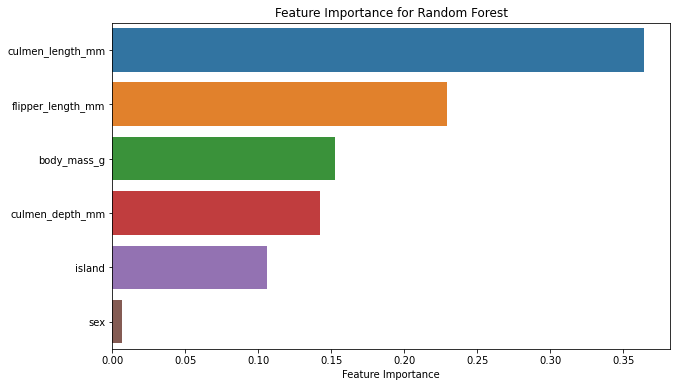

In [59]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

Asagida Random Forest ile Decision Tree modellerindeki feature_importance degerlerini goruyoruz. Decision Tree en onemli feature olarak flipper_length_mm secmisti. Fakat Random Foresten onemli feature' i culmen_length_mm olarak secti. Agirliklar tamamen degisti. Feature  importance kullanirken mutlaka **Random Forest** modelini tercih etmemiz gerekiyor cunku daha adil davraniyor.

In [60]:
pd.concat([rf_feature_imp, dt_feature_imp], axis=1)

,Feature Importance,Feature Importance
culmen_length_mm,0.364040,0.336093
flipper_length_mm,0.228925,0.531201
body_mass_g,0.152599,0.028136
culmen_depth_mm,0.142287,0.009044
island,0.105742,0.084673
sex,0.006407,0.010853


## Understanding Hyperparameters

In [61]:
from sklearn.tree import plot_tree

def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0], feature_names=X.columns, 
          class_names=df.species.unique(),
          filled = True,
          fontsize = 8);

Yukaridaki denklemi skor sonuclari ve gorsellestirme icin Decision Tree' de de kullandik. Burda extra olarak plot_tree' nin icine 'model.estimators_[0]' ekledik. kac agac varsa burda o agaclari teker teker gorsellestirebiliriz. Burda 0. agaci gorsellestirmek istedik.

Mesela model.estimators_[0] yerine model.estimators_[1] yazarsak her seferinde Root Node' daki feature seciminin degistigini gorebiliriz. Her agacta en iyi feature' i secmez. MAX_FEATURE parametresinde feature sayilarinin karekokunu aldigi icin daha az feature arasindan en iyiyi secer. Burda feature sayisi 9 oldugu icin karekokunu alacak ve 3 tane rastgele feature sececek ve bunlar arasindan en iyisini sececek. Her adimda bunu yapacak. Modeli overfitting' den kurtaran bu rastsalliktir.

Butun agaclar birbirinden bagimsizdir. Prediction icin her agactan tahminlerini alir en fazla oyu alan class kazanir.

In [65]:
pruned_tree = RandomForestClassifier()
pruned_tree.fit(X_train,y_train)

RandomForestClassifier()



Test Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



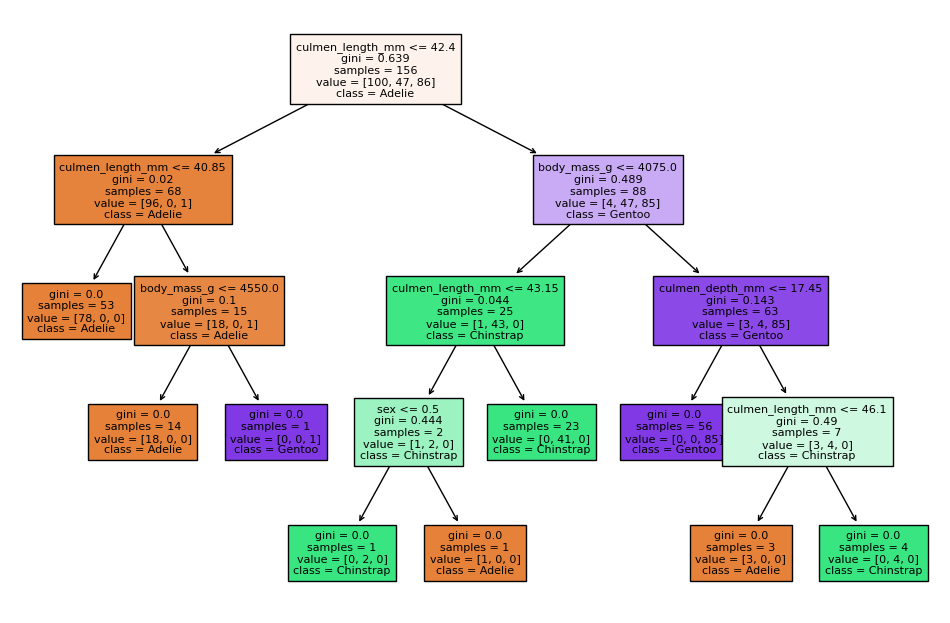

In [66]:
report_model(pruned_tree)

!! Agaclardaki sample sayisina dikkat edersek 233 sample' in hepsini almiyor, datanin yaklasik olarak 2/3' unu rastgele olarak secer. Bu rastgelelik hem sample sayisinda hem de feauture sayisinda oldugu icin modeli overfitting' den kurtarir.

## Prediction

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


Asagida olusturdugumuz modele prediction icin bir ornek verelim. Bunu yaparken mantikli degerler vermek adina yukaridaki orijinal df'teki min max degerlerinden faydalanalim :

In [74]:
observations = {"island": ["Torgersen", "Biscoe"], "culmen_length_mm":[35, 48], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[180, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

In [75]:
obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,180,3000,FEMALE
1,Biscoe,48,20,210,4600,MALE


Yukarida categoric diye bir degisken atamistik. Yeni olusturdugumuz obs' un icine bu degiskeni atarak obs icinde categirc verileri secmis oluruz.

In [76]:
obs[cat] 

,island,sex
0,Torgersen,FEMALE
1,Biscoe,MALE


Yukarida cat Encoder isleminde hangi class'a hangi sayiyi verdiyse burda da ayni sayilari versin diye asagida transform islemini de yapiyoruz.

In [77]:
obs[cat] = enc.transform(obs[cat])

In [78]:
obs  # Island ve sex sayisal verilere donustu.

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,35,15,180,3000,0.0
1,0.0,48,20,210,4600,1.0


Egittigimiz model verdigimiz ornekle asagidaki sonuclari elde etti :

In [79]:
pred = rf_model.predict(obs)
pred

array(['Adelie', 'Gentoo'], dtype=object)

## Inverse transform

Elimizde yuzlerce feature var ve biz categoric verilerin ne oldugunu bilmiyoruz cunku encoder uyguladik ve bunlari gormek istiyoruz diyelim. Bunun icin "Inverse Transform (ters donusum)" kullanilir. Yukaridaki islemden sonra inverse_transform ile eski haline donusturup asagidaki gibi gorebiliriz. 

In [132]:
obs[cat] = enc.inverse_transform(obs[cat])

In [133]:
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,180,3000,FEMALE
1,Biscoe,48,20,210,4600,MALE


Tahminleri aldigimiz pred' in ismini prediction olarak degistirelim, seriye cevirelim ve obs ile birlikte concat yapip tum feature' lari ve tahmini birlikte gorelim :

In [141]:
pred = pd.Series(pred).rename("prediction")

In [142]:
pd.concat([obs, pred], axis=1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,prediction
0,Torgersen,35,15,180,3000,FEMALE,Adelie
1,Biscoe,48,20,210,4600,MALE,Gentoo


## Evaluating ROC Curves and AUC

Ikiden fazla class oldugu icin yellowbrick' ten ROCAUC' u kullandik. Sol ust koseden skorlarin cok iyi oldugunu gorebiliyoruz. Sadece cok az %99 civari skorlar var. Modelin genel performansi cok iyi cikti. 

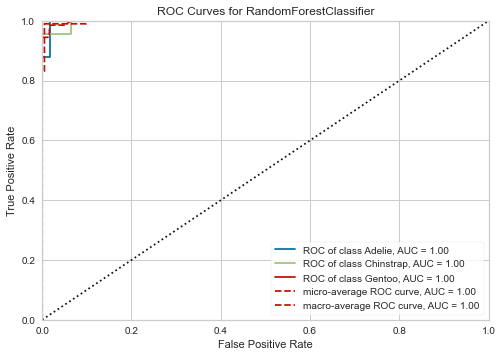

In [80]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

## DT and RF Scoring for diabetes dataset

Yukarida skorlarimiz cok iyiydi bu yuzden GridSearch yapmamistik. Bunun yerine dengesiz bir dataset olan 'ditabes.csv' datasi uzerinden hem Decision Tree hem Random Forest modellerine bakalim. Bu datasetinden daha once elde ettigimiz Logistic Regression ve SVM modellerindeki skorlar ile de karsilastiralim :

In [81]:
df = pd.read_csv("diabetes.csv")

In [82]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Train | Test Split and Scalling

In [85]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

!!!! Bu data setinde Encoder islemi yapmiyoruz cunku zaten butun degerler numeric !!!!

## Modelling and Model Performance

### Decision Tree

In [89]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

'balanced' islemine illa GridSearch ile karar vermeye gerek yok. Eger data seti dengesizse bunu bastan belirleyebiliriz. Burda datamiz dengesiz.

In [90]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=101)

In [91]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 32]
 [21 47]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       124
           1       0.59      0.69      0.64        68

    accuracy                           0.72       192
   macro avg       0.70      0.72      0.71       192
weighted avg       0.74      0.72      0.73       192


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



Yukaridaki skorlarda overfit durumu bariz bir sekilde goruluyor. Cross Validate islemi uygulayalim :

__Cross Validate__

In [63]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.673533
test_precision    0.540205
test_recall       0.525000
test_f1           0.529386
dtype: float64

Cross Validate sonucu skorlarimiz daha da kotulesti. Demek ki overfitting durumu var. En iyi parametreleri bulmak icin GridSearch yapalim :

__GridSearch__

In [93]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],    #None= Butun feature' lari kullan
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [94]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [95]:
dt_grid_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

GridSearch isleminden sonra skorlarimizin iyilestigini goruyoruz. Train ve Test set arasinda da cok fark yok. 

In [67]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[50 74]
 [10 58]]
              precision    recall  f1-score   support

           0       0.83      0.40      0.54       124
           1       0.44      0.85      0.58        68

    accuracy                           0.56       192
   macro avg       0.64      0.63      0.56       192
weighted avg       0.69      0.56      0.56       192


Train_Set
[[159 217]
 [ 19 181]]
              precision    recall  f1-score   support

           0       0.89      0.42      0.57       376
           1       0.45      0.91      0.61       200

    accuracy                           0.59       576
   macro avg       0.67      0.66      0.59       576
weighted avg       0.74      0.59      0.58       576



__Cross Validate__

In [68]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101, 
                 max_depth= 5,
                 max_features= 3,
                 min_samples_leaf= 2,
                 min_samples_split= 9,
                 splitter= 'random')

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.578342
test_precision    0.470387
test_recall       0.825000
test_f1           0.574327
dtype: float64

Cross Validate isleminden sonra da skorlar birbirine yakin cikti. Modelimiz guvenilir. 

__Precision_Recall_Curve__

Skorlarimizin durumuna bakmak icin bir de precision_recall_curve cizdirdik.(Dengesiz bir data seti oldugu icin precision_recall_curve sectik.) Modelimizin genel performansi cok dusuk.

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

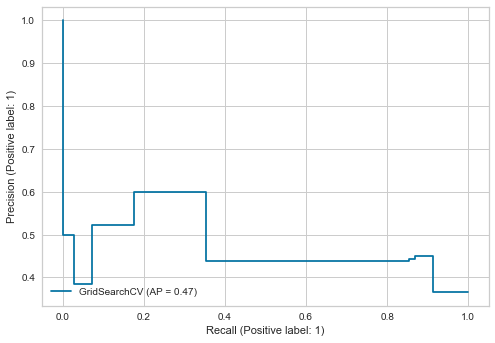

In [97]:
plot_precision_recall_curve(dt_grid_model, X_test, y_test);

Logisctic Regression ve SVM' de precision_recall_curve skorlari %70' lerdeydi. Burda % 47 cikti. Yukarida recall, f1 skoru gibi skorlar ne kadar iyi cikmis olsa da modelimizin genel performansi cok dusuk. 

### Random Forest

In [101]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

In [102]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

Asagida Random Forest modelde recall ve precision degerleri cok daha dengeli cikti. Fakat Train ve Test set arasinda cok fark var. Bir overfitting durumu goruluyor. Random Forest overfitting ile mucadele eder ama burda edememis. Bunun sebebi datanin kucuk olmasi. ok buyuk datalarda bu cok daha rahat gozlemlenir.

In [105]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[105  19]
 [ 25  43]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       124
           1       0.69      0.63      0.66        68

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192


Train_Set
[[376   0]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       200

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



__Cross Validate__

Tek seferlik skorlar ile Cross Validate sonucu alinan skorlar da birbirine yakin cikti. Overfitting oldugunu burada da teyit ettik :

In [106]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy     0.753479
test_precision    0.700666
test_recall       0.565000
test_f1           0.613294
dtype: float64

__Grid Search__

Yukaridaki overfitting durumunu gidermek icin GridSearch ile best_parametreleri secelim.

In [107]:
param_grid = {'n_estimators':[50, 100, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

Asagidaki kodda fit islemini ayri bir kodda yapmadik, GridSearch' un sonuna ilave ettik.

In [111]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [112]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

GridSearch sonucu skorlar cok iyi degil ama oncesine gore biraz daha iyilesti. Train ve Test set sonuclari birbirine biraz yaklasti :

In [76]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 38]
 [16 52]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       124
           1       0.58      0.76      0.66        68

    accuracy                           0.72       192
   macro avg       0.71      0.73      0.71       192
weighted avg       0.75      0.72      0.72       192


Train_Set
[[294  82]
 [ 35 165]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       376
           1       0.67      0.82      0.74       200

    accuracy                           0.80       576
   macro avg       0.78      0.80      0.79       576
weighted avg       0.82      0.80      0.80       576



GridSearch isleminden sonra f1 genel olarak sabit kalir; precision ve recall skorlari birbirine yaklasir.

__Precision_Recall_Curve__

precision_recall_curve skorlarimiz, Decision Tree modele gore daha iyi cikti. 

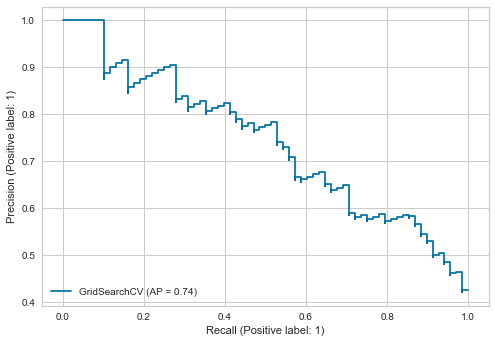

In [77]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

Bu data seti icin; Logistic Regression, SVM, Decision Tree, Random Forest modelleri arasindan Logistic Regression ve SVM' nin cok daha iyi sonuclar verdigini soyleyebiliriz. 

---------------------------------------------------------------------------------------------------------------------------------------------------------

TREE BASED MODELLERDE ; 

1- Scale islemi yapılmasına gerek yok.

2- Get_dummies yapilmaz.

3- Best_treshold aranmaz. GridSearch islemi sonucu alinan skorlarla yola devam edilir. (Train setinde full skor aldigi icin best treshold da muhtemelen ayni cikacaktir.)